#### 5.2.2.4. 无监督学习示例：鸢尾花数据降维

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

%matplotlib inline
import seaborn as sns; sns.set()
# sns.pairplot(iris, hue='species', size=1.5);

X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

D:\Python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


本节将介绍一个无监督学习问题——对鸢尾花数据集进行降维，以便能更方便地对数据进行可视化。前面介绍过，鸢尾花数据集由四个维度构成，即每个样本都有四个维度。

降维的任务是要找到一个可以保留数据本质特征的低维矩阵来表示高维数据。降维通常用于辅助数据可视化的工作，毕竟用二维数据画图比用四维甚至更高维的数据画图更方便！

下面将使用主成分分析（principal component analysis，PCA，详情请参见5.9 节）方法，这是一种快速线性降维技术。我们将用模型返回两个主成分，也就是用二维数据表示鸢尾花的四维数据。

同样按照前面介绍过的建模步骤进行：

In [3]:
from sklearn.decomposition import PCA # 1.选择模型类

model = PCA(n_components=2) # 2.设置超参数，初始化模型
model.fit(X_iris) # 3.拟合数据，注意这里不用y变量
X_2D = model.transform(X_iris) # 4. 将数据转换为二维

现在来画出结果。快速处理方法就是先将二维数据插入到鸢尾花的DataFrame 中，然后用Seaborn 的lmplot 方法画图（如图5-16 所示）：

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


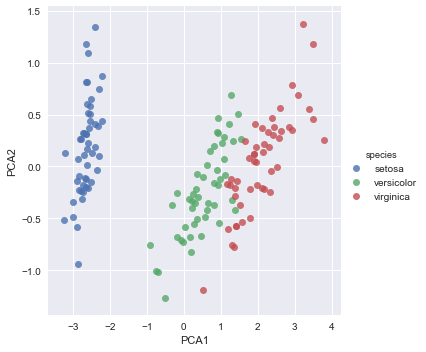

In [5]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


从二维数据表示图可以看出，虽然PCA 算法根本不知道花的种类标签，但不同种类的花还是被很清晰地区分开来！这表明用一种比较简单的分类方法就能够有效地学习这份数据集，就像前面看到的那样。